In [7]:
#convertir les equations sous forme matricielle 
#contenue de la matrice et theta
import numpy as np;
from sklearn.datasets import make_regression
#pour visualiser les données 
import matplotlib.pyplot as plt 

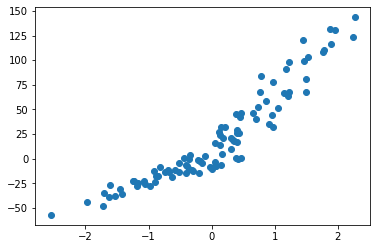

In [8]:
# un modèle polynomiale
#pour toujours reproduire le même dataset
np.random.seed(0)
x,y = make_regression(n_samples = 100 , n_features = 1, noise = 10)
y = y +abs(y/2)
plt.scatter(x,y)

In [23]:
print(x.shape)
#make_regression , les dimentions des y sont incompletes -- donc [reshape] pour redimentionner
y = y.reshape(y.shape[0],1) #on prend le nombre de lignes dans y appelé shape[0]
print(y.shape)

(100, 1)
(100, 1)


In [24]:
#créer matrice X 
#hstake coller deux vecteurs numpy ensemble
#je colle mon vexteur X à côté d'un vecteur des 1 qui a le même nombre de lignes que X
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2,X))
print (X.shape)
print (X[:10])#print juste les 10 première lignes 

(100, 3)
[[ 0.12927848 -0.35955316  1.        ]
 [ 0.95382381  0.97663904  1.        ]
 [ 0.1618788   0.40234164  1.        ]
 [ 0.66120688 -0.81314628  1.        ]
 [ 0.78816353 -0.88778575  1.        ]
 [ 0.19701457  0.44386323  1.        ]
 [ 0.95507205 -0.97727788  1.        ]
 [ 0.18346819  0.42833187  1.        ]
 [ 0.04337847  0.20827498  1.        ]
 [ 0.09706498 -0.31155253  1.        ]]


In [26]:
theta = np.random.randn(3,1)
theta.shape
theta

array([[ 1.15233156],
       [ 1.07961859],
       [-0.81336426]])

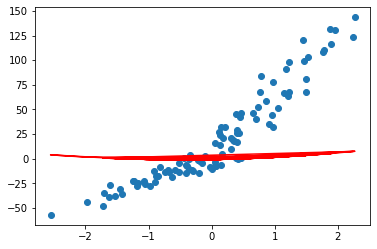

In [27]:
#Modèle linéraire 

def model (X,theta):
    #profuit matriciel
    return X.dot(theta)

plt.scatter(x,y)
plt.plot(x,model(X,theta),c ='r')

In [28]:
#fonction côut
def cost_fonction(x,y,theta):
    m = len(y)
    return 1/(2*m)* np.sum((model(X,theta)-y)**2)

In [29]:
cost_fonction (X,y,theta) #on veut que ce soit proche du 0

1205.309692363075

In [30]:
#gradients et descente de gradients 
def grad(X,y,theta):
    m = len(y)
    return 1/m* X.T.dot(model(X,theta)-y)

In [62]:
# descente de gradients 



#phase d'entrainement 
def gradient_descent(X,y,theta,learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    #créer theta history initialiser avec un tableux 
    theta_history = np.zeros((n_iterations,2))
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_fonction(X,y,theta)
        theta_history[i,:] = theta.T 
        
    return theta, cost_history, theta_history


In [64]:
n_iterations = 10
learning_rate = 0.01
theta_final, cost_history , theta_history= gradient_descent(X,y,theta,learning_rate, n_iterations)

predictions = model(X,theta_final)
plt.scatter(x,y)
for i in range (n_iterations):
    plt.plot(x,model(X,theta_history[i]))
    ????????????????????????????????????????????

ValueError: could not broadcast input array from shape (3,) into shape (2,)

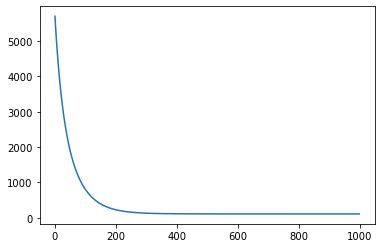

In [46]:
plt.plot(range(10),cost_history) # à traver les 100
#si valeur se rapproche d'un manimale, c'est que c'est réussi

In [47]:
#évaluer  la performation du modèle pour montrer aux gens 
# la coéficient de détermination 
#moindre carré
#R²
def coef_determination (y,predi):
    u = ((y-predi)**2).sum()#residu de la somme des carrée
    v = ((y - y.mean())**2).sum()
    return 1 - u/v
coef_determination (y,prediction)

0.9772295611859987